<a href="https://colab.research.google.com/github/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/blob/main/MVP_AnaClaraRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 2 - Machine Learning e Analytics
# Pontifícia Universidade Católica PUC-Rio
### Aluno (a). Ana Clara Rodrigues
#### MVP Sprint 2 (Abril/2024)



## 1.0 Definição do Problema
---

**Qual o objetivo desse MVP?**

A proposta desse MVP é criar um classificador que visa prever se uma criança é considerada autista, para isso iremos utilizar o “Q-Chart-10” que é um questionário preenchido pelos pais ou cuidadores das crianças avaliadas cujo objetivo é identificar possíveis sinais precoces de autismo em crianças.

**Como fazer isso?**

Nosso objetivo neste trabalho é preparar os dados, realizar a modelagem e treinamento das bases, e avaliar os resultados utilizando técnicas aprendidas em aula.

A ideia inicial é em uma consulta rotineira os pais ou cuidadores receberem um questionário de perguntas e respostas que iram ser analisados pelo nosso modelo que irá prever se essa criança pode ser autista.

Propomos um novo conjunto de dados para o rastreamento do autismo em crianças, com características comportamentais relevantes, visando aprimorar a eficiência da triagem de TEA.

**Premissas e Hipóteses:**

**Premissa:** O diagnóstico precoce do Transtorno do Espectro Autista (TEA) é essencial para reduzir os custos de saúde, porém os longos tempos de espera e procedimentos onerosos ressaltam a necessidade urgente de métodos de triagem eficazes.

**Hipótese:** Um modelo de machine learning treinado com um conjunto de dados utilizado para o rastreamento do autistmo em crianças, com características comportamentais relevantes, visando aprimorar a eficiência da triagem de TEA.

**Restrição ou Condição:** Não houve restrições ao selecionar os dados onde foi aproveitado todo o dataset.


**Sobre o *dataset* utilizado**

O dataset usado neste projeto será o **Autism screening data for toddlers** proveniente originalmente do https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download

Como seus dados estão rotulados, trata-se de um **aprendizado supervisionado**.

O conjunto de dados foi desenvolvido pelo Dr. Fadi Fayez Thabtah usando um aplicativo móvel chamado ASDTests para rastrear autismo em crianças pequenas.

**Informações sobre os atributos:**
1. **Case_No** - Um ID para cada criança.
2. **A1** - Seu filho olha para você quando você chama o nome dele? (númerico)
3. **A2** - É fácil para você manter o contato visual com seu filho? (numérico)
4. **A3** - Seu filho aponta para indicar algo? (numérico)
5. **A4** - Seu filho aponta para compartilhar interesse com vc? (numérico)
6. **A5** - Seu filho finge? (numérico)
7. **A6** - Seu filho segue para onde você está olhando? (numérico)
8. **A7** - Se você ou outra pessoa da família está visivelmente chateada, seu filho mostra sinanis de querer confortá-los? (numérico)
9. **A8** - Você descreveria as primeiras palavras de seu filho como? (numérico)
10. **A9** - Seu filho usa gestos simples? (numérico)
11. **A10** - Seu filho não encara nada sem propósito aparente? (numérico)
12. **Age_monts** - A idade da pessoa em meses. (numérico)
13. **Qchat-10-Score** - Pontuação total do Qchat.
14. **Sexo** - Gênero do indivíduo (m/f).
15. **Ethnicity** - Contém informações sobre as etnias. (sim/não)
16. **Jaundice** - Informa se a criança nasceu com icterícia.
17. **Family_mem_with_ASD** - Informa se a familia da criança tem algum membro com ASD/TEA. (sim/não)
18. **Quem completou o teste** - Quem foi a pessoa que fez o teste.
19. **Classe/ASD Traits** - Possui caracteristicas do TEA? (sim/não)

**OBS.:** A1 - A10 são algumas perguntas e suas respostas são dadas como rótulos '1' ou '0'.


## 2.0 Importações Necessárias
---

Nessa seção inicial importaremos bibliotecas que utilizaremos no decorrer do MVP.


In [3]:
# Fazendo os imports das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Verificaremos a versão da matplotlib instalada.

In [4]:
# Verificando a versão da matplotlib instalada
print(f"A versão MatPlotLib instalada é a {mpl.__version__}")

A versão MatPlotLib instalada é a 3.7.1


Também configuraremos o MVP para não exibir mensagens de aviso.

In [5]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 3.0 Carga de Dados
---
Nessa seção iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [7]:
# Importando o arquivo em formato csv hospedado em meu Github
url = "https://raw.githubusercontent.com/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/main/Toddler%20Autism%20dataset%20July%202018.csv"

# Cabeçalho das colunas
colunas = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Age_Mons','Qchat-10-Score','Sex',
           'Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits']

tea_data = pd.read_csv(url,skiprows=1, names=colunas, delimiter = ',')


In [8]:
tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## 4.0 Análise Exploratória de Dados
---
Nesta primeira etapa será realizada uma análise exploratória do dataset, onde iremos verificar como os dados estão organizados e como eles se relacionam, serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 4.1 Dimensões e Informações
---
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

Checaremos a identificação dos nomes dos atributos de coluna no *dataset*.

In [9]:
# Mostrando o nome dos atributos do dataset
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

Iremos renomear algumas colunas para melhor identificação.

In [10]:
tea_data = tea_data.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits": "ASD Traits"})
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [11]:
tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


Checaremos a seguir o número de linhas e colunas do *dataset*.

In [12]:
# Mostra as dimensões (linhas e colunas) do dataset
print(tea_data.shape)

(1054, 18)


Podemos verificar acima que o dataset tem 1054 linhas (entradas) de 18 colunas (atributos).



Mostraremos a seguir a estrutura dos atributos do *dataset*. Com essas informações verificaremos os tipos dos atributos do *dataset* para identificar quais deles poderemos fazer suas possíveis conversões.


In [13]:
# Mostra as informações do dataset
print(tea_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age Months              1054 non-null   int64 
 11  Qchat-10-Score          1054 non-null   int64 
 12  Sex                     1054 non-null   object
 13  Ethnicity               1054 non-null   object
 14  Jaundice                1054 non-null   object
 15  Family Me

Podemos observar que o conjunto de dados possui 6 colunas de tipo string, enquanto o restante é composto por dados numéricos. Além disso, não há valores **nulos** presentes, portanto não é necessário realizar tratamento de dados faltantes.







Verificaremos abaixo o número de valores únicos de cada atributo.

In [14]:
# Verificando o número de valores únicos dos atributos
tea_data.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family Member with ASD     2
Who completed the test     5
ASD Traits                 2
dtype: int64

Percebemos que o nosso *dataset* não possui atributo de coluna com um único valor. Aqueles que possuem apenas dois valores são representados por "Sim/Não" ou "0/1".

Isso também nos leva a perceber que não há redundância de linhas no nosso *dataset*.

### 4.2 Visualizações Unimodais
---
Faremos nessa seção perguntas e análises gráficas baseadas apenas em um atributo.


**Qual é a porcentagem de crianças afetadas pelo TEA?**

---


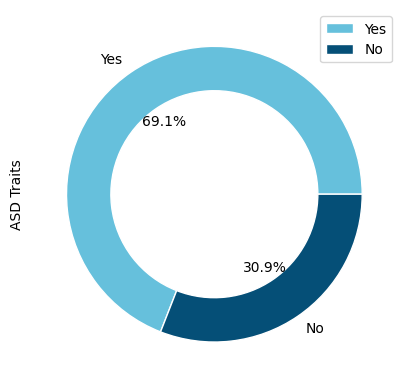

In [15]:
# Criar o gráfico de pizza com a cor azul
tea_data["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'), colors=['#66C0DC', '#054F77'],label="ASD Traits")

# Definir os rótulos da legenda
labels = tea_data["ASD Traits"].value_counts().index

# Adicionar legenda
plt.legend(labels=labels, loc="upper right")

# Exibir o gráfico
plt.show()



Pode-se estimar que cerca de **69,1%** das crianças no mundo são afetadas pelo Transtorno do Espectro do Autismo.

**Quais comportamentos de A1 a A10 mais contribuem nas taxas de TEA?**

---



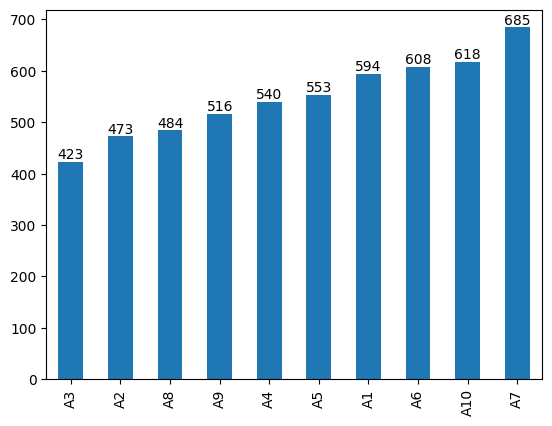

In [16]:
ax = tea_data.iloc[:, :10].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);


Foi observado nos dados que a maioria das crianças demonstrava cuidado em relação aos pais quando estes estavam visivelmente chateados. Por outro lado, apenas 423 crianças manifestaram um desejo por brinquedos ou algo semelhante.

**Countplots**

---
Os countplots são gráficos que mostram a distribuição da frequência de ocorrência de cada valor único em uma variável categórica. Cada subplot exibe quantas vezes cada valor único aparece para uma determinada variável do conjunto de dados. Esses gráficos são úteis para visualizar a distribuição de dados categóricos e identificar padrões ou discrepâncias nos dados. Neste caso específico, vamos exibir um countplot para cada variável categórica presente no conjunto de dados, organizando-os em uma grade para facilitar a comparação entre as variáveis.

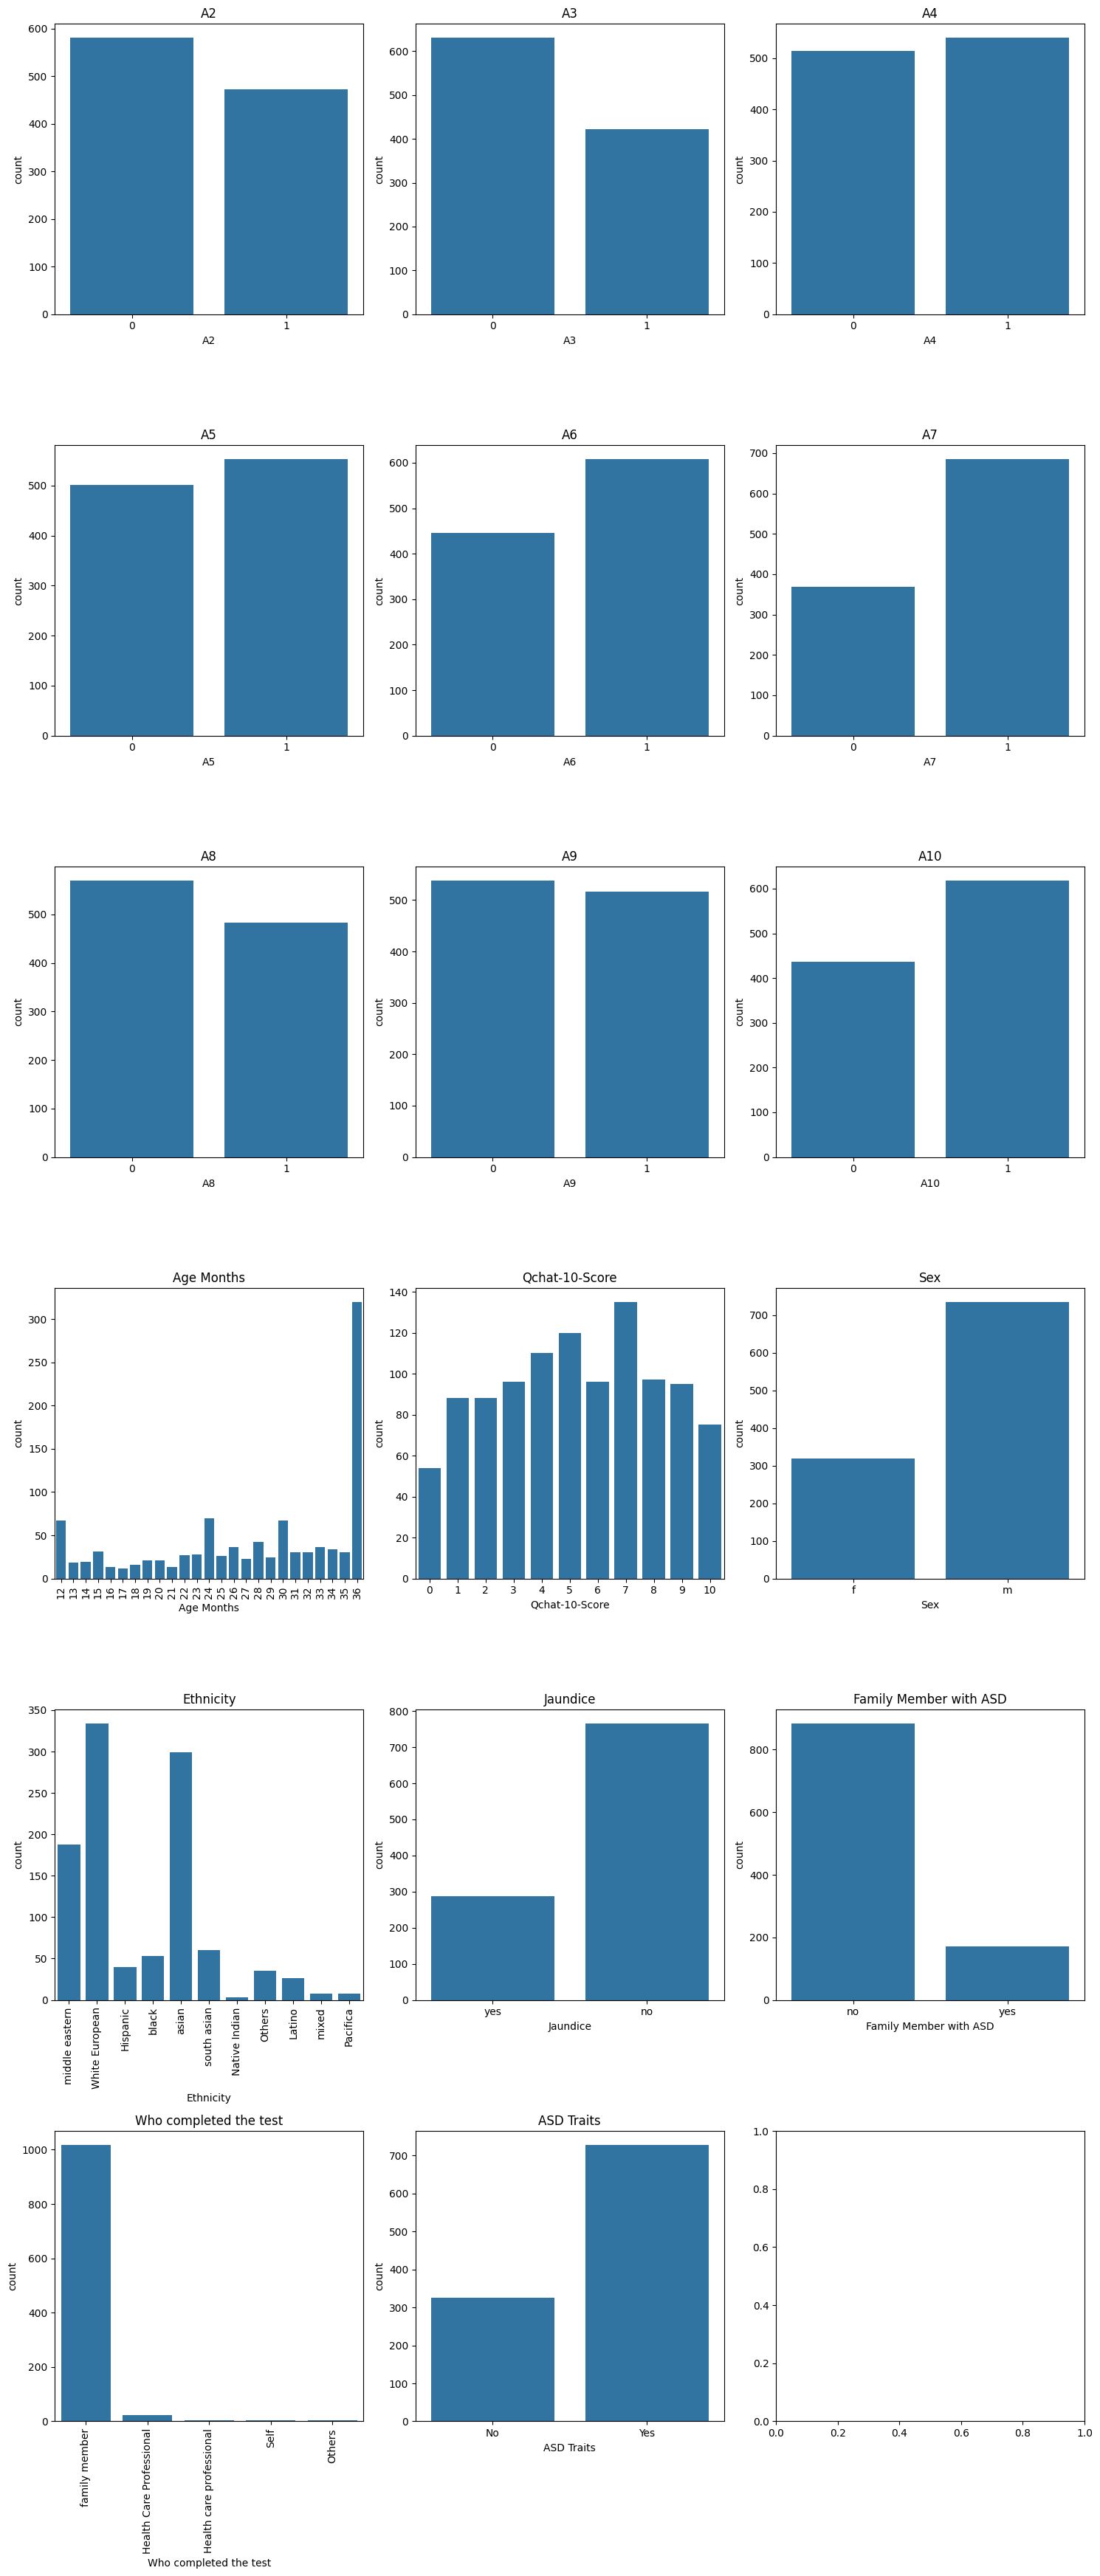

In [17]:
# Visualiação de countplots para cada atributo

fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(tea_data.iloc[:,1:]):
    sns.countplot(x=tea_data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()



### 4.3 Visualizações Multimodais

---
Nessa seção faremos visualizações gráficas que irá compor a análise que tem como foco a investigação dos traços do Transtorno do Espectro Autista (TEA) em relação a uma variedade de outros atributos coletados em nossa base de dados.


**Diagnostico de TEA em relação aos outros atributos**

---


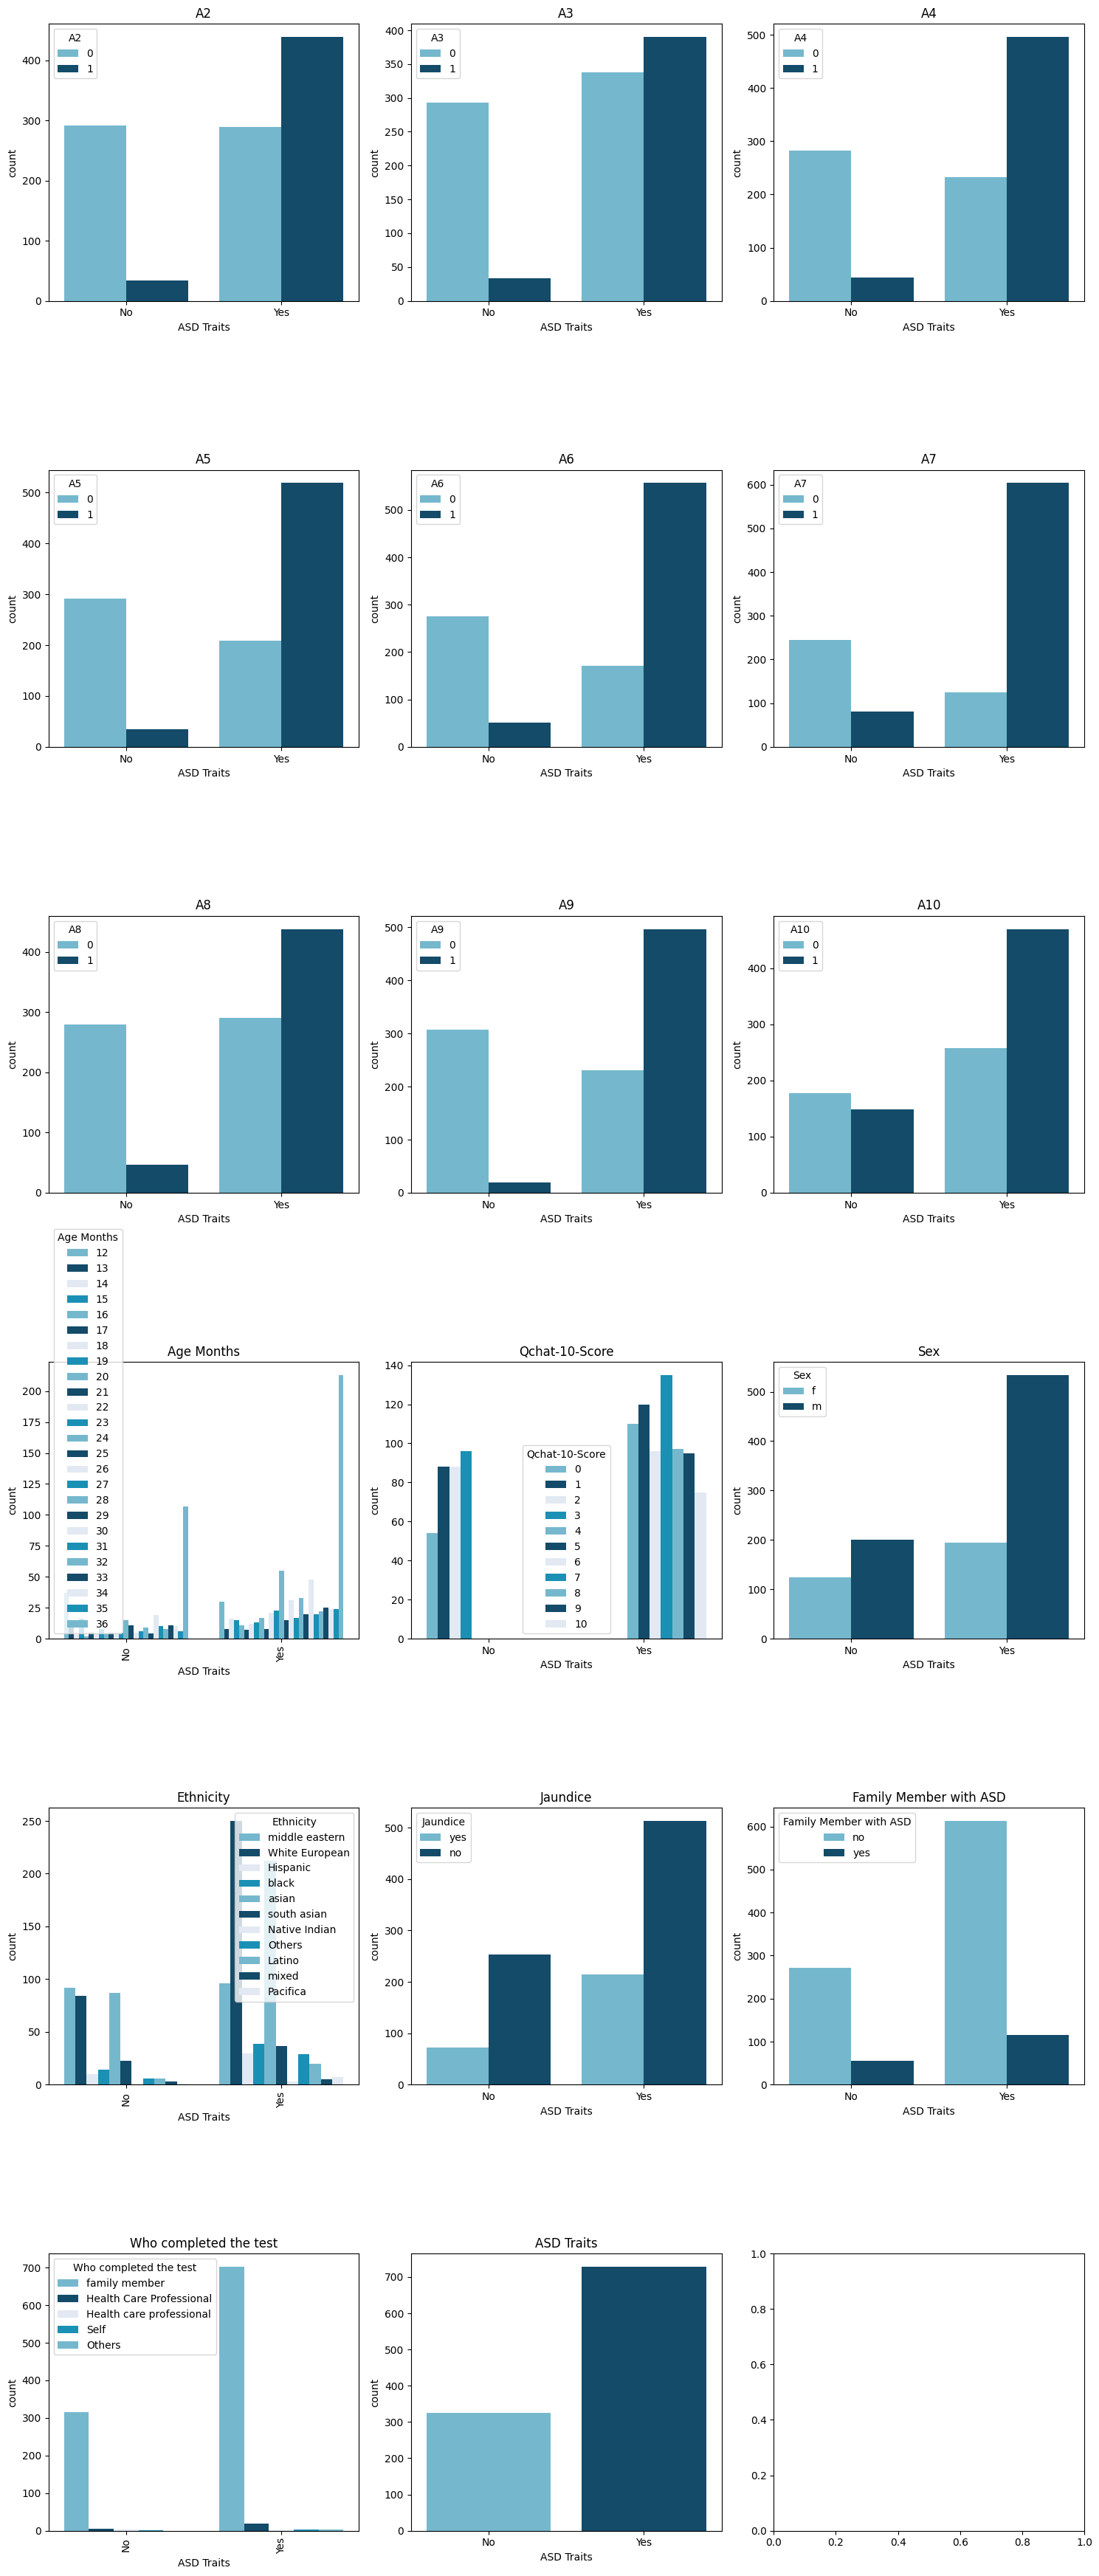

In [18]:
# Definir esquema de cores
colors = ['#66C0DC', '#054F77', '#DFE9F5', '#009DCF']

# Criar subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(tea_data.iloc[:, 1:]):
    sns.countplot(x=tea_data["ASD Traits"], hue=tea_data[col], ax=axes[i], palette=colors)
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()



Concluímos que há uma disparidade significativa entre os gêneros masculino e feminino, com uma proporção de mais que o dobro de casos masculinos em relação aos femininos.

Além disso, os dados revelam que em todos os casos analisados, algumas crianças apresentavam o Transtorno do Espectro Autista (TEA), enquanto membros de suas famílias não tinham o diagnóstico. Isso sugere que o TEA não é exclusivamente genético.

Notavelmente, constatamos que o dobro de crianças positivas para o autismo não apresentaram histórico de icterícia neonatal.


**Diagnostico de TEA em relação a Étnia**

---
Nesta seção, iremos analisar a distribuição étnia nos casos positivos e negativos de Transtorno do Espectro Autista (TEA), visando compreender possíveis associações entre etnia e o diagnóstico de TEA.

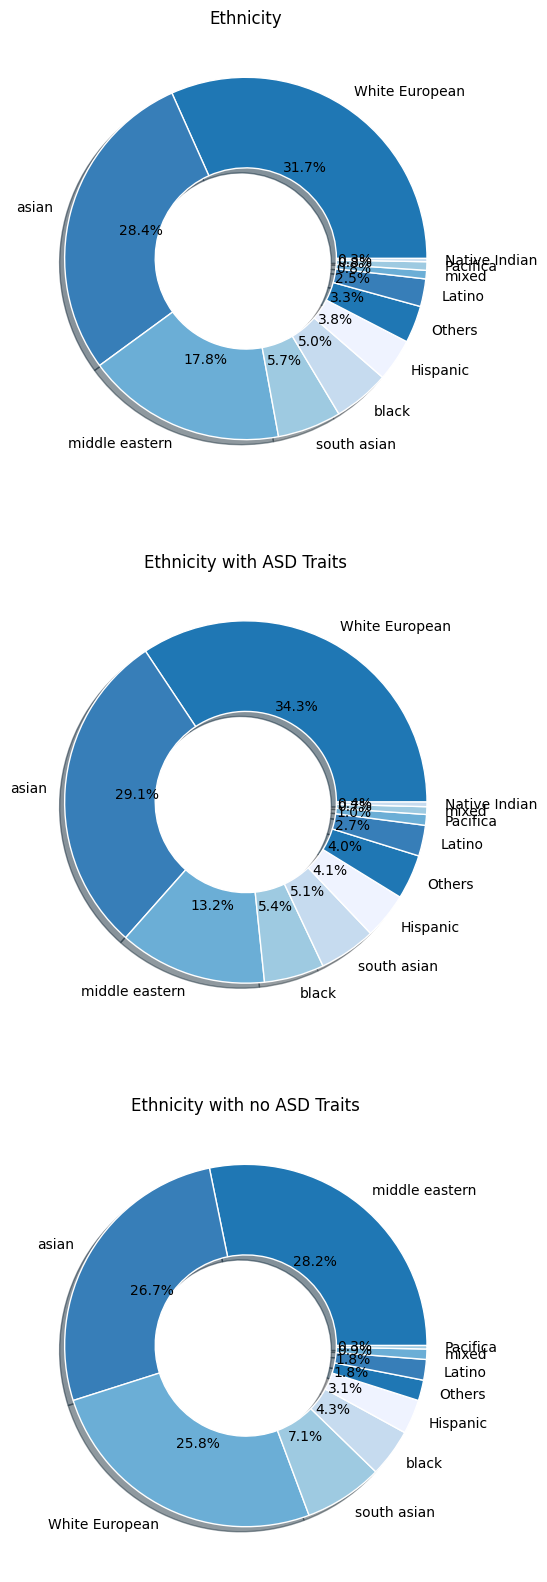

In [19]:
# Definir tamanho das fatias do gráfico de pizza
size = 0.5

# Definir os valores e rótulos para a primeira parte do gráfico
eth_vals = tea_data["Ethnicity"].value_counts()
labels_eth = eth_vals.index

# Definir os valores e rótulos para as outras partes do gráfico
yes = tea_data[tea_data["ASD Traits"]=="Yes"]["Ethnicity"].value_counts()
no = tea_data[tea_data["ASD Traits"]=="No"]["Ethnicity"].value_counts()

# Criar a figura e os subplots
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

# Definir lista de cores azuis
blue_colors = ['#1f77b4', '#377eb8', '#6baed6', '#9ecae1', '#c6dbef', '#eff3ff']

# Plotar os gráficos de pizza
ax[0].pie(eth_vals, radius=1, colors=blue_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[0].set_title("Ethnicity")

ax[1].pie(yes, radius=1, colors=blue_colors, labels=yes.index, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[1].set_title("Ethnicity with ASD Traits")

ax[2].pie(no, radius=1, colors=blue_colors, labels=no.index, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[2].set_title("Ethnicity with no ASD Traits")

plt.show()


Concluímos que as características do Transtorno do Espectro Autista (TEA) apresentam uma prevalência significativamente alta no Oriente Médio e na Europa Branca, enquanto em Pacifica e Latino essa prevalência é substancialmente menor.

## 5.0 Pré-Processamento de dados
---
Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 5.1 Tratamento de Missings e Limpeza
---

Nesta etapa, procuraremos identificar e eliminar quaisquer irregularidades presentes no conjunto de dados, visando aprimorar e elevar sua qualidade. O processo de limpeza de dados inclui a verificação da coerência das informações, a correção de eventuais erros e a gestão de valores nulos e/ou redundantes, seja preenchendo-os adequadamente ou removendo-os.

Produziremos nesse momento o tratamento e as manipulações em um *dataset* provisório, preservando o *dataset* original.

In [20]:
# Salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original
tea_data_limpo = tea_data

Como já havíamos verificado anteriormente, não temos redundância no *dataset*.

In [21]:
tea_data_limpo.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family Member with ASD     2
Who completed the test     5
ASD Traits                 2
dtype: int64

Confirmaremos a existência de dados nulos (*NULL*) para cada atributo do *dataset*.

In [22]:
# # Verificando dados nulos nos atributos
tea_data_limpo.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age Months                0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family Member with ASD    0
Who completed the test    0
ASD Traits                0
dtype: int64

Corfome visto anteriormente não possuimos valores nulos para tratamento.

Optei por excluir a coluna Qchart-10-Score, uma vez que esta atribui uma pontuação que poderia potencialmente influenciar o resultado da classificação.

Ao manter esse atributo, existe o risco de o modelo se tornar sobre-ajustado aos dados de treinamento, prejudicando sua capacidade de generalização para novos dados.

In [23]:
#Excluindo a coluna Qchart-10-Score
tea_data_limpo.drop(columns=["Qchat-10-Score"], inplace=True)

In [24]:
#Identificando a idade minima e maxima do nosso dataset
mini = tea_data_limpo["Age Months"].min()
maxi = tea_data_limpo["Age Months"].max()
print(f"Idade minima {mini} meses e a idade máxima {maxi} meses")

Idade minima 12 meses e a idade máxima 36 meses


In [25]:
# Criar uma coluna 'Age' dividindo 'Age Months' por 12 e converter para inteiros
tea_data_limpo["Age"] = (tea_data_limpo["Age Months"] / 12).astype(int)

# Excluir a coluna 'Age Months'
tea_data_limpo.drop(columns=["Age Months"], inplace=True)


In [26]:
tea_data_limpo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits,Age
1,0,0,0,0,0,0,1,1,0,1,f,middle eastern,yes,no,family member,No,2
2,1,1,0,0,0,1,1,0,0,0,m,White European,yes,no,family member,Yes,3
3,1,0,0,0,0,0,1,1,0,1,m,middle eastern,yes,no,family member,Yes,3
4,1,1,1,1,1,1,1,1,1,1,m,Hispanic,no,no,family member,Yes,2
5,1,1,0,1,1,1,1,1,1,1,f,White European,no,yes,family member,Yes,1


In [27]:
#Mudando a ordem das colunas

order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age', 'Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD',
       'Who completed the test', 'ASD Traits']
tea_data_limpo = tea_data_limpo[order]


In [28]:
tea_data_limpo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,2,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,3,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,3,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,2,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,1,f,White European,no,yes,family member,Yes


In [29]:
tea_data_limpo.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD',
       'Who completed the test', 'ASD Traits'],
      dtype='object')

### 5.2 Preparação dos Dados
---

Nesta etapa, iremos realizar operações de preparação dos dados.

**LABEL ENCODING**

---
Usaremos a tecnica Label Encoding para converter colunas categóricas em numéricas para que possam ser ajustadas por modelos de aprendizado de máquina que aceitam apenas dados numéricos. É uma importante etapa de pré-processamento em um projeto de aprendizado de máquina.

In [30]:
le = LabelEncoder()
tea_data_limpo["Sex"] = le.fit_transform(tea_data_limpo["Sex"])
tea_data_limpo["Jaundice"] = le.fit_transform(tea_data_limpo["Jaundice"])
tea_data_limpo["Family Member with ASD"] = le.fit_transform(tea_data_limpo["Family Member with ASD"])
tea_data_limpo["ASD Traits"] = le.fit_transform(tea_data_limpo["ASD Traits"])
tea_data_limpo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,2,0,middle eastern,1,0,family member,0
2,1,1,0,0,0,1,1,0,0,0,3,1,White European,1,0,family member,1
3,1,0,0,0,0,0,1,1,0,1,3,1,middle eastern,1,0,family member,1
4,1,1,1,1,1,1,1,1,1,1,2,1,Hispanic,0,0,family member,1
5,1,1,0,1,1,1,1,1,1,1,1,0,White European,0,1,family member,1


**ONEHOT ENCODING**

---

Usamos o OneHot Encoding quando precisamos converter as variáveis categóricas com múltiplas categorias e queremos representá-las como vetores binários. Por exemplo, se temos uma variável "cor" com categorias "vermelho", "azul" e "verde", usar o One-Hot Encoding criaria três novas variáveis binárias: "vermelho" (1 ou 0), "azul" (1 ou 0) e "verde" (1 ou 0). Isso permite que modelos de machine learning entendam as diferentes categorias sem atribuir importâncias relativas incorretas. O One-Hot Encoding é comumente utilizado em algoritmos como regressão logística, redes neurais e árvores de decisão.

In [31]:
tea_data_limpo = pd.get_dummies(tea_data_limpo, columns=["Ethnicity", "Who completed the test"], drop_first=True)
tea_data_limpo = tea_data_limpo.astype(int)
tea_data_limpo.head()



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [32]:
tea_data_limpo.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family Member with ASD', 'ASD Traits',
       'Ethnicity_Latino', 'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')

In [33]:
#Mudaremos a ordem
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family Member with ASD', 'Ethnicity_Latino',
        'Ethnicity_Native Indian','Ethnicity_Others', 'Ethnicity_Pacifica',
        'Ethnicity_White European','Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'ASD Traits']

tea_data_limpo = tea_data_limpo[order]
tea_data_limpo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
5,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


###5.3 Divisão de Dados

---
Iremos entrar na etapa de divisão de dados que é um processo fundamental em machine learning onde o conjunto de dados disponível é dividido em conjuntos distintos para diferentes finalidades, como treinamento, validação e teste.

In [35]:
tea_data_treino = tea_data_limpo.copy()


In [36]:
tea_data_treino

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
5,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1051,0,0,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1052,1,0,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,1,1
1053,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


**Separação de Treino e Teste**

---


In [38]:
# Separação em bases de treino e teste (holdout)
array = tea_data_treino.values
X = array[:, 0:28]  # Atributos (0 ao 29)
y = array[:, 28]    # Target corresponde à coluna "ASD Traits"

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

**Feature Scaling**

---

É o processo de seleção de variáveis que são relevantes para o modelo de machine learning, usaremos a **Normalização.**


In [40]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Validação Cruzada**

---


In [41]:
# Criando os folds para a validação cruzada
num_particoes = 10  # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)  # faz o particionamento em 10 folds

## 6.0 Construção do Modelo
---

Model building, ou construção de modelo, refere-se ao processo de criação e desenvolvimento de um modelo de machine learning com o objetivo de resolver um problema específico.


In [51]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Reg Log', LogisticRegression()))
models.append(('R Forest', RandomForestClassifier()))

# Criar um DataFrame para armazenar os resultados
results_df = pd.DataFrame()

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Adicionar os resultados ao DataFrame
    model_results = pd.DataFrame({
        'Model': name,
        'Accuracy': cv_results.mean(),
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }, index=[0])

    results_df = pd.concat([results_df, model_results], ignore_index=True)

# Exibir o DataFrame com os resultados
print(results_df)

      Model  Accuracy  Precision    Recall        F1
0       KNN  0.949062   0.980287  0.944732  0.962181
1      CART  0.912171   0.958484  0.917098  0.937335
2        NB  0.812591   0.973034  0.747841  0.845703
3       SVM  0.984580   0.986254  0.991364  0.988803
4   Reg Log  0.997619   0.998273  0.998273  0.998273
5  R Forest  0.960826   0.960818  0.974093  0.967410


O modelo de Regressão Logística obteve a maior acurácia entre todos os modelos testados, atingindo 99.76%. Apresentou valores muito altos de precisão, recall e F1-score, todos acima de 99.8%. Isso indica que o modelo tem uma excelente capacidade de identificar corretamente os casos positivos (recall) e de evitar falsos positivos (precisão), resultando em um equilíbrio geral entre precisão e recall (F1-score).

Com base nessas considerações, o modelo de Regressão Logística parece ser uma escolha sólida para este problema de classificação, oferecendo alta precisão, recall e F1-score, além de ser facilmente interpretável.

### 6.6 Testando os Modelos

---
Nesta etapa, vamos testar cinco modelos de classificação diferentes para resolver o problema em questão. Testar esses modelos nos permitirá avaliar sua eficácia na tarefa de classificação e determinar qual deles é mais adequado para resolver o problema específico que estamos abordando.

In [56]:
# Criando um modelo com todo o conjunto de treino
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))


1.0


O resultado da acuracia do modelo é de 95%.

## 5.0 Conclusão
---